In [2]:
#Python CAPM Code (Capital Asset Pricing Model)

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import pandas_datareader as web
%matplotlib inline

In [65]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.  In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    
    Returns
    -------
    slope : float
        Slope of the regression line.
    intercept : float
        Intercept of the regression line.
    rvalue : float
        Correlation coefficient.
    pvalue : float
        Two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, 

In [66]:
#This is the index indicator for S&P 500
spy_etf = web.DataReader('SPY', 'yahoo')

In [67]:
spy_etf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2015-04-30 to 2020-04-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1258 non-null   float64
 1   Low        1258 non-null   float64
 2   Open       1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Volume     1258 non-null   float64
 5   Adj Close  1258 non-null   float64
dtypes: float64(6)
memory usage: 68.8 KB


In [68]:
spy_etf.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-04-30,210.350006,207.619995,209.880005,208.460007,161304900.0,188.639069
2015-05-01,210.770004,209.279999,209.399994,210.720001,103399700.0,190.684189
2015-05-04,212.020004,211.100006,211.229996,211.320007,70927200.0,191.227142
2015-05-05,211.460007,208.729996,211.029999,208.899994,113326200.0,189.037262
2015-05-06,209.929993,206.759995,209.559998,208.039993,135060200.0,188.259018


In [69]:
spy_etf.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-22,281.000000,276.910004,278.350006,279.100006,93524600.0,279.100006
2020-04-23,283.940002,278.750000,280.489990,279.079987,104709700.0,279.079987
2020-04-24,283.700012,278.500000,280.730011,282.970001,85166000.0,282.970001
2020-04-27,288.269989,284.619995,285.119995,287.049988,77896600.0,287.049988
2020-04-28,291.399994,285.399994,291.019989,285.730011,104906700.0,285.730011


In [74]:
#Define start and end
start = pd.to_datetime('2015-05-01')
end = pd.to_datetime('2020-04-28')

In [75]:
aapl = web.DataReader('AAPL', 'yahoo', start, end)

In [76]:
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-04-30,128.639999,124.580002,128.639999,125.150002,83195400.0,115.170479
2015-05-01,130.130005,125.300003,126.099998,128.949997,58512600.0,118.667458
2015-05-04,130.570007,128.259995,129.500000,128.699997,50988300.0,118.437393
2015-05-05,128.449997,125.779999,128.149994,125.800003,49271400.0,115.768646
2015-05-06,126.750000,123.360001,126.559998,125.010002,72141000.0,115.041649


Text(0.5, 1.0, 'AAPL vs Index Close')

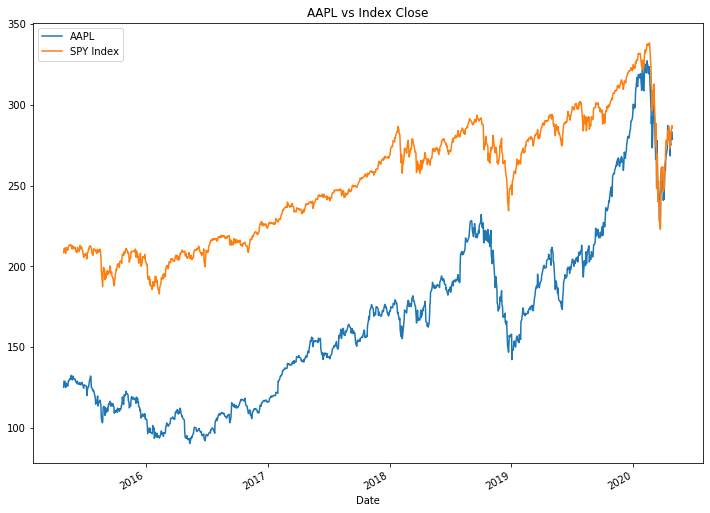

In [77]:
aapl['Close'].plot(label='AAPL', figsize=(12,9))
spy_etf['Close'].plot(label='SPY Index', figsize=(12,9))
plt.legend()
plt.title('AAPL vs Index Close')

In [78]:
#Compare cummulative return
aapl['Cummulative']=aapl['Close']/aapl['Close'].iloc[0]
spy_etf['Cummulative']=spy_etf['Close']/spy_etf['Close'].iloc[0]

Text(0.5, 1.0, 'AAPL vs Index Cummulative')

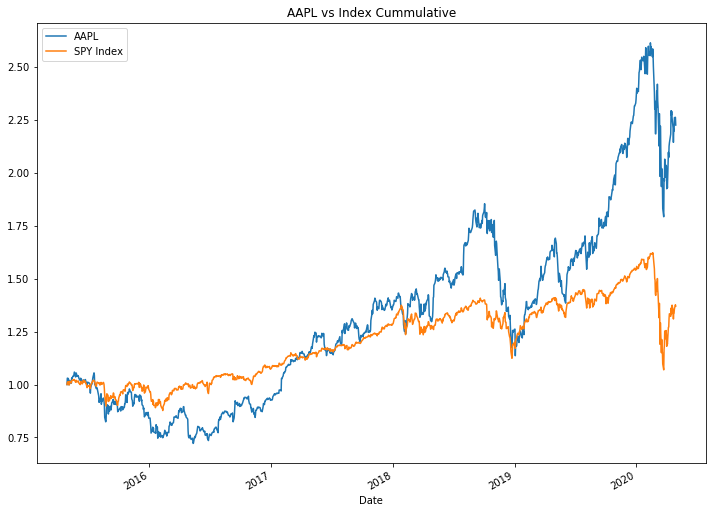

In [79]:
aapl['Cummulative'].plot(label='AAPL', figsize=(12,9))
spy_etf['Cummulative'].plot(label='SPY Index', figsize=(12,9))
plt.legend()
plt.title('AAPL vs Index Cummulative')

In [80]:
#Compare daily return
aapl['Daily return']=aapl['Close'].pct_change(1)
spy_etf['Daily return']=spy_etf['Close'].pct_change(1)

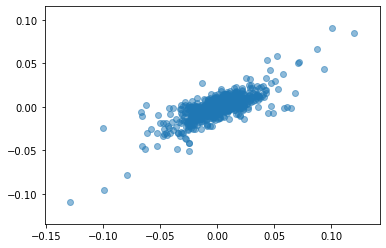

In [82]:
plt.scatter(aapl['Daily return'],spy_etf['Daily return'], alpha= 0.5)

In [84]:
#Can see some relationship

In [92]:
#Find linear regression
#Calculate beta:
beta,alpha,r_value,p_value,std_err = stats.linregress(aapl['Daily return'].iloc[1:],
                                                      spy_etf['Daily return'].iloc[1:])

In [93]:
beta

0.4970543385414767

In [94]:
alpha

-7.813179689088613e-05

In [90]:
r_value

0.767518063570932

In [91]:
std_err

0.011718443709418167

In [95]:
#This is a considerable beta and r_value as COVID-19

In [98]:
#Create noise from random numpy, normally distrbuted
noise = np.random.normal(0,0.001,len(spy_etf['Daily return'].iloc[1:]))

In [99]:
noise

array([ 0.0004801 , -0.00012532, -0.0009349 , ...,  0.00069394,
       -0.00115117,  0.00019625])

In [103]:
#Spy + noise
fake_stock = spy_etf['Daily return'].iloc[1:]+noise

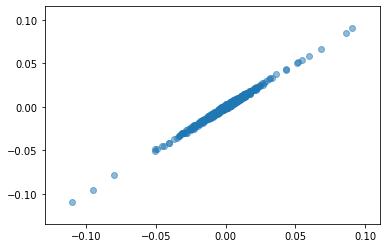

In [108]:
plt.scatter(fake_stock,spy_etf['Daily return'].iloc[1:], alpha= 0.5)

In [114]:
#Great relationship with noise data
#Find beta for noise
beta,alpha,r_value,p_value,std_err = stats.linregress(fake_stock,
                                                      spy_etf['Daily return'].iloc[1:])

In [115]:
beta

0.9909555400009704

In [116]:
alpha

-1.2433544377157834e-05

In [117]:
r_value

0.9964779079390719

In [ ]:
#Algorithms need higher alpha!!